In [8]:
import rioxarray
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rasterio.enums import Resampling

In [2]:
#print working directory
print(os.getcwd())

/home/naheemadebisi/snow-analytics


In [2]:
#Define a clip polygon 
cropping_geometries = [{
    'type': 'Polygon',
    'coordinates':[
        [[604276,4863907], [601703,4867245], [606245,4870497], [608397,4866855]]
        ]
}]

In [3]:
#open UAVSAR raster file

Jan15_20 = rioxarray.open_rasterio('MCS2/MCS_15_20Jan2021_snow_diff.tif')
Jan20_27 = rioxarray.open_rasterio('MCS2/MCS_20_27Jan2021_snow_diff.tif')
#Jan27_03 = rioxarray.open_rasterio('MCS2/MCS_27_03Feb2021_snow_diff.tif')
Feb03_10 = rioxarray.open_rasterio('MCS2/MCS_03_10Feb2021_snow_diff.tif')
Feb10_03 = rioxarray.open_rasterio('MCS2/MCS_feb10_03Mar2021other_snow_diff.tif')
Mar03_10 = rioxarray.open_rasterio('MCS2/MCS_03_10Mar2021_snow_diff.tif')
Mar10_16 = rioxarray.open_rasterio('MCS2/MCS_10_16Mar2021_snow_diff.tif')
Mar16_22 = rioxarray.open_rasterio('MCS2/MCS_16_22Mar2021_snow_diff.tif')

array_list = [Jan15_20, Jan20_27, Feb03_10, Feb10_03, Mar03_10, Mar10_16, Mar16_22]



In [4]:
#read the lidar raster file
lidar = rioxarray.open_rasterio('/home/naheemadebisi/snow-analytics/Western-Snow-Conference/QSI_DEMs/MCS_15Mar21_snowdepth_diff.tif')

In [9]:
clip_list = []
squeeze_list = []
df_uavsar = []
lidar_match = []
df_lidar = []

for i in range(len(array_list)):
    clip_list.append(array_list[i].rio.clip(geometries = cropping_geometries, crs = 31965))
    squeeze_list.append(clip_list[i].squeeze().drop("spatial_ref").drop("band"))
    squeeze_list[i].name = "uavsar"
    df_uavsar.append(squeeze_list[i].to_dataframe().reset_index())
    lidar_match.append(lidar.rio.reproject_match(clip_list[i], resampling= Resampling.average).squeeze().drop("spatial_ref").drop("band"))
    lidar_match[i].name = "lidar"
    df_lidar.append(lidar_match[i].to_dataframe().reset_index())

    

In [10]:
#merge the dataframe
df_merge = []
for i in range(len(df_uavsar)):
    df_merge.append(pd.merge(df_uavsar[i], df_lidar[i], on=['x', 'y']))


In [ ]:
#create a figure of 7 axes
fig, ax = plt.subplots(7, 1, figsize=(12, 14))
for i in range(7):
    df_merge[i].plot.scatter(ax = ax[i], x='uavsar', y='lidar')

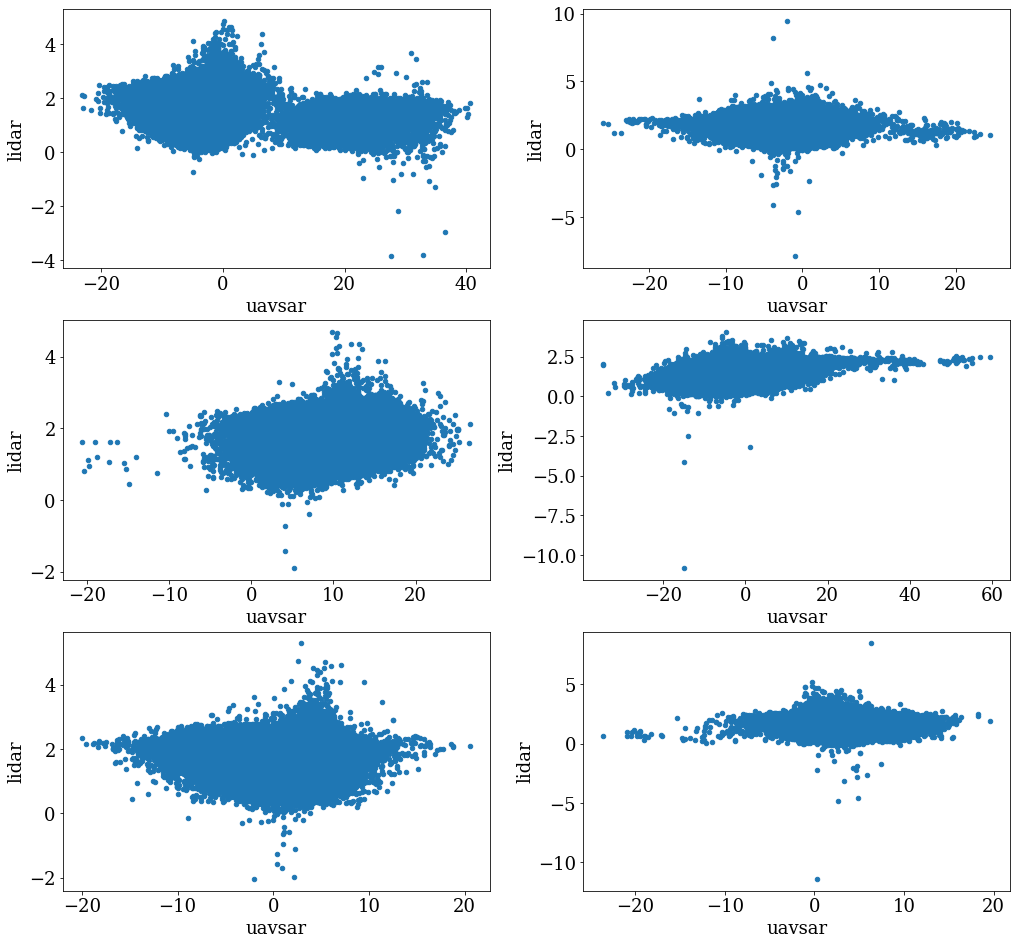

In [15]:
# Set font size and font family
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure of 7 axes
fig, axs = plt.subplots(3, 2, figsize=(14, 13), constrained_layout = True)

ax = axs.flatten()

for i in range(6):
    df_merge[i].plot.scatter(ax = ax[i], x='uavsar', y='lidar')

#save the figure
plt.savefig('/home/naheemadebisi/snow-analytics/lowman/uavsar-lidar-scatter.jpeg', dpi=500)